# Проект для Яндекс.Практикума. Сегментация клиентов банка

## Материалы

[Презентация] https://disk.yandex.ru/i/HVCDo2EUVAKKcg

**Задача**:

Проанализируйте клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов.

- Проведите исследовательский анализ данных,
- Сегментируйте пользователей на основе данных о количестве потребляемых продуктов,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.*
    
По итогам исследования подготовьте презентацию.

# Загрузка данных, первичный осмотр, предобработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from IPython.display import display

def load_csv_choose_path(filename):
    """
    Функция читает csv файл, проверяя 2 пути,
    чтобы не требовалось править код перед отправкой ревьюверу.
    Созданна коллективно в da_24_teamwork
    """
    path1 = filename
    path2 = '/datasets/' + filename
    if os.path.exists(path1):
        data = pd.read_csv(path1)
    elif os.path.exists(path2):
        data = pd.read_csv(path2)
    else:
        raise FileNotFoundError(filename)
    print('-=',filename, '=-') 
    print()
    print(data.info())
    print()
    display(data.head())
    display(data.describe())
    return data

In [2]:
bankset = load_csv_choose_path('bank_dataset.csv')
bankset

-= bank_dataset.csv =-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None



,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


## Описание данных

Итак, мы имеем датасет на 10000 строк и 12 колонок, 11 столбцов полных, 1 - неполный (примерно 60% данных), типы данных на первый взгляд соответствуют данным.

Обращаю внимание на странную минимальную заработную плату, она очень маленькая - ошибка? посмотрю подробнее дальше

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## Осмотр и предобработка

In [3]:
#приведу названия всех столбцов к нижнему регистру
bankset.columns = bankset.columns.str.lower()

In [4]:
bankset.info()
#получилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
#проверю на дубликаты
bankset.duplicated().sum()

0

In [6]:
bankset['userid'].nunique()

10000

все пользователи в датасете уникальные, данные полные, дубликатов нет, тип данных int64 соответствует

In [7]:
bankset['score'].value_counts()

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: score, Length: 460, dtype: int64

In [8]:
bankset['score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score, dtype: float64

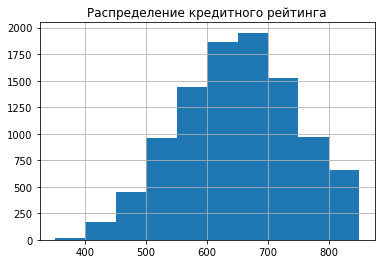

In [9]:
bankset['score'].hist();
plt.title('Распределение кредитного рейтинга')
plt.show()

Кредитный скоринг - данные полные, тип данных ок, распределение данных немного смещено вправо, что перекликается с тем фактом, выявленным далее, что среди клиентов много заемщиков (то есть логично, что они имеют хороший кредитный рейтинг). Хотя далее я не увидела никакой корреляции между рейтингом и другими данными.

In [10]:
bankset['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

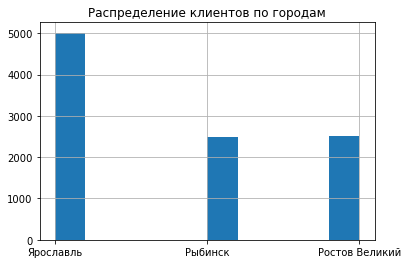

In [11]:
bankset['city'].hist();
plt.title('Распределение клиентов по городам')
plt.show()

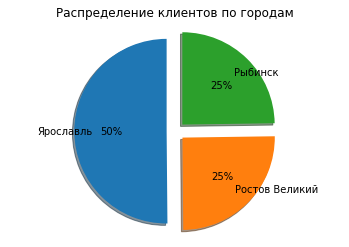

In [12]:
labels = 'Ярославль','Ростов Великий','Рыбинск'
explode = (0.1,0.1,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(bankset['city'].value_counts(), explode = explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90, labeldistance = 0.8, pctdistance = 0.6)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Распределение клиентов по городам')
plt.show()

Данные о городе полные, тип данных соответствует.
Почти ровно половина клиентов из Ярославля и по 1/4 соответственно из Рыбинска и Ростова Великого.

In [13]:
bankset['age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: age, Length: 70, dtype: int64

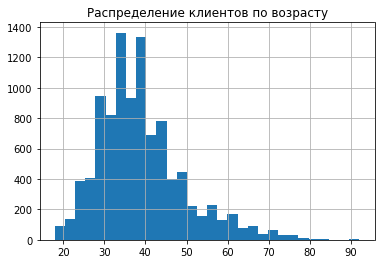

In [14]:
bankset['age'].hist(bins=30);
plt.title('Распределение клиентов по возрасту')
plt.show()

Клиенты от 18 до 92 лет, распределение похоже на нормальное, обрезано слева, что логично.

In [15]:
bankset['gender'].value_counts()

М    5457
Ж    4543
Name: gender, dtype: int64

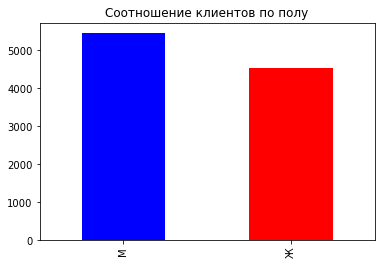

In [16]:
my_colors = ('blue', 'red')
bankset['gender'].value_counts().plot(kind='bar', color=my_colors);
plt.title('Соотношение клиентов по полу')
plt.show()


Мальчиков процентов на 10 больше, чем девочек.

In [17]:
bankset['objects'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

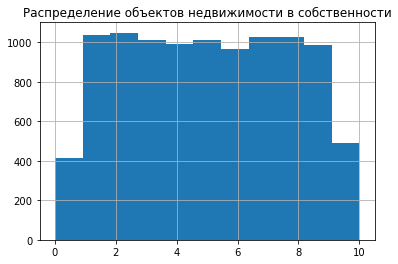

In [18]:
bankset['objects'].hist(bins=11);
plt.title('Распределение объектов недвижимости в собственности')
plt.show()

Какое-то странно почти ровное распределение.

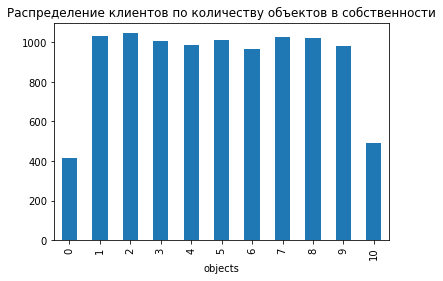

In [19]:
bankset.groupby('objects')['userid'].count().plot(kind='bar');
plt.title('Распределение клиентов по количеству объектов в собственности')
plt.show()

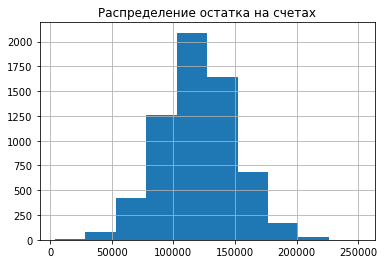

In [20]:
bankset['balance'].hist();
plt.title('Распределение остатка на счетах')
plt.show()

Посмотрю отдельно на записи с пропущенной информацией о балансе:

In [21]:
bankset.loc[bankset['balance'].isnull() == True]

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


In [22]:
print('Доля клиентов с пропуском в данных об остатках на счетах: {:.1%}'.format(3617/10000))

Доля клиентов с пропуском в данных об остатках на счетах: 36.2%


Сравню распределения признаков для клиентов с нулевым балансом и ненулевым балансом:

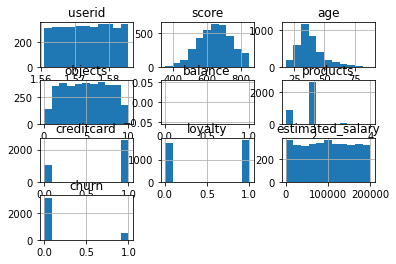

In [23]:
bankset.loc[bankset['balance'].isnull() == True].hist(bins=11);

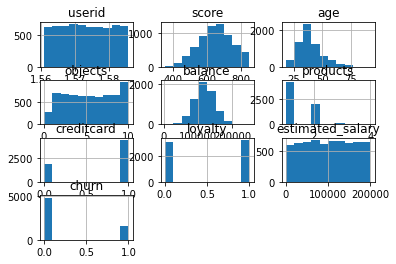

In [24]:
bankset.loc[bankset['balance'].isnull() == False].hist();

При поверхностном просмотре распределений признаков видно разницу в количестве продуктов - почему-то среди клиентов с нулевым остатком на счете больше тех, кто пользуется двумя продуктами. А среди тех, у кого ненулевой остаток, больше тех, кто пользуется только одним продуктом. 
Предположение: клиенты с одним продуктом и ненулевым балансом - это зарплатный проект.

В данных о балансе на счете нет нулей, что странно, поэтому я предполагаю, что NaN - это как раз клиенты с нулевым остатком на счетах. Но пока не буду заменять на ноль (по рекомендации тимлида)

In [25]:
#bankset['balance'].fillna(0, inplace=True)

In [26]:
bankset['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

В основном у клиентов 1 или 2 продукта, а 3-4 продукта у 3% клиентов.

Посмотрим на доход:

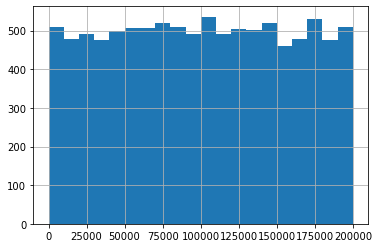

In [27]:
bankset['estimated_salary'].hist(bins=20);

Так, гистограмма не подходит для этих данных, а что ящик с усами?

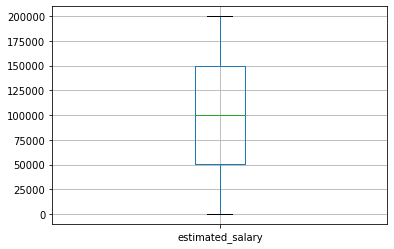

In [28]:
bankset.boxplot(column = 'estimated_salary')
plt.show()

Очень странное распределение количества клиентов по уровню зарплаты. В этом признаке логично было бы видеть нормальное распределение, а мы видим очень ровное распределение с квартилями по 50000 без выбросов.

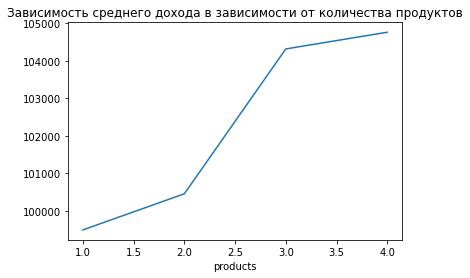

In [29]:
bankset.groupby('products')['estimated_salary'].mean().plot()
plt.title('Зависимость среднего дохода в зависимости от количества продуктов')
plt.show()

Как показало дальнейшее исследование, эта кривая ничего не значит. Разница в среднем доходе между клиентами с 1 и 2 продуктами статистически не значима, а клиентов с 3-4 продуктами очень мало и они почти все ушли))

# Исследовательский анализ данных


## Срезы по балансу (нулевой/ненулевой)
сравню группы клиентов с нулевым (пропуском данных) и ненулевым балансом - есть ли другие отличия между этими группами

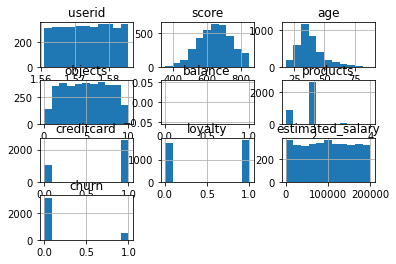

In [30]:
bankset.loc[bankset['balance'].isnull() == True].hist(bins=11);

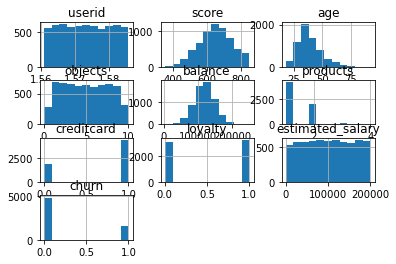

In [31]:
bankset.loc[bankset['balance'].isnull() == False].hist(bins=11);

Выше я обратила внимание, что среди клиентов с нулевым остатком на счете больше тех, кто пользуется двумя продуктами. А среди тех, у кого ненулевой остаток, больше тех, кто пользуется только одним продуктом. Предположение: клиенты с одним продуктом и ненулевым балансом - это зарплатный проект.
В данных о балансе на счете нет нулей, что странно, поэтому я предполагаю, что NaN - это как раз клиенты с нулевым остатком на счетах. Но пока не буду заменять на ноль (по рекомендации тимлида)

In [32]:
bankset.loc[bankset['balance'].isnull() == True].corr()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
userid,1.000000,-0.007686,0.038495,0.009265,NaN,0.006402,-0.002023,0.000368,0.015201,0.000197
score,-0.007686,1.000000,0.005005,-0.002494,NaN,0.030447,0.012355,0.016331,-0.005177,-0.023290
age,0.038495,0.005005,1.000000,-0.042974,NaN,-0.077580,0.005717,0.125392,-0.006173,0.248126
objects,0.009265,-0.002494,-0.042974,1.000000,NaN,0.014130,0.015682,-0.003405,-0.000204,-0.036872
balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
products,0.006402,0.030447,-0.077580,0.014130,NaN,1.000000,-0.015766,0.039449,0.008699,-0.226427
creditcard,-0.002023,0.012355,0.005717,0.015682,NaN,-0.015766,1.000000,-0.000272,-0.019101,-0.011213
loyalty,0.000368,0.016331,0.125392,-0.003405,NaN,0.039449,-0.000272,1.000000,-0.007386,-0.126508
estimated_salary,0.015201,-0.005177,-0.006173,-0.000204,NaN,0.008699,-0.019101,-0.007386,1.000000,0.019418
churn,0.000197,-0.023290,0.248126,-0.036872,NaN,-0.226427,-0.011213,-0.126508,0.019418,1.000000


Далее я много смотрю корреляцию в различных разрезах, поэтому напишу для неё функцию:

In [33]:
def correlation_func(data, title):
    # Plot
    plt.figure(figsize=(12,10), dpi= 80)
    sns.heatmap(data.corr(), xticklabels=data.corr().columns, 
                yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

    # Decorations
    plt.title(title, fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

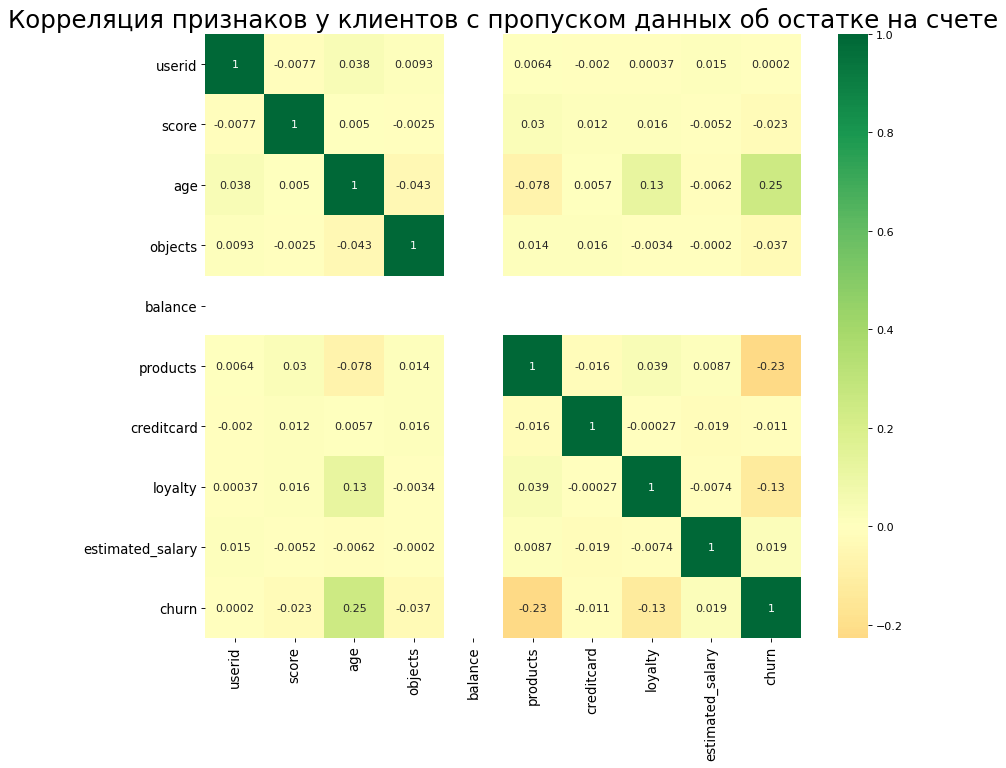

In [34]:
correlation_func(bankset.loc[bankset['balance'].isnull() == True], 'Корреляция признаков у клиентов с пропуском данных об остатке на счете')

Есть небольшая прямая корреляция между возрастом и оттоком и обратная корреляция между оттоком и количеством продуктов и активностью. 
Связь между возрастом и оттоком я далее более подробно рассмотрю. По продуктам и активности получается, что чем больше продуктов и активности, тем меньше отток - ну это логично. 

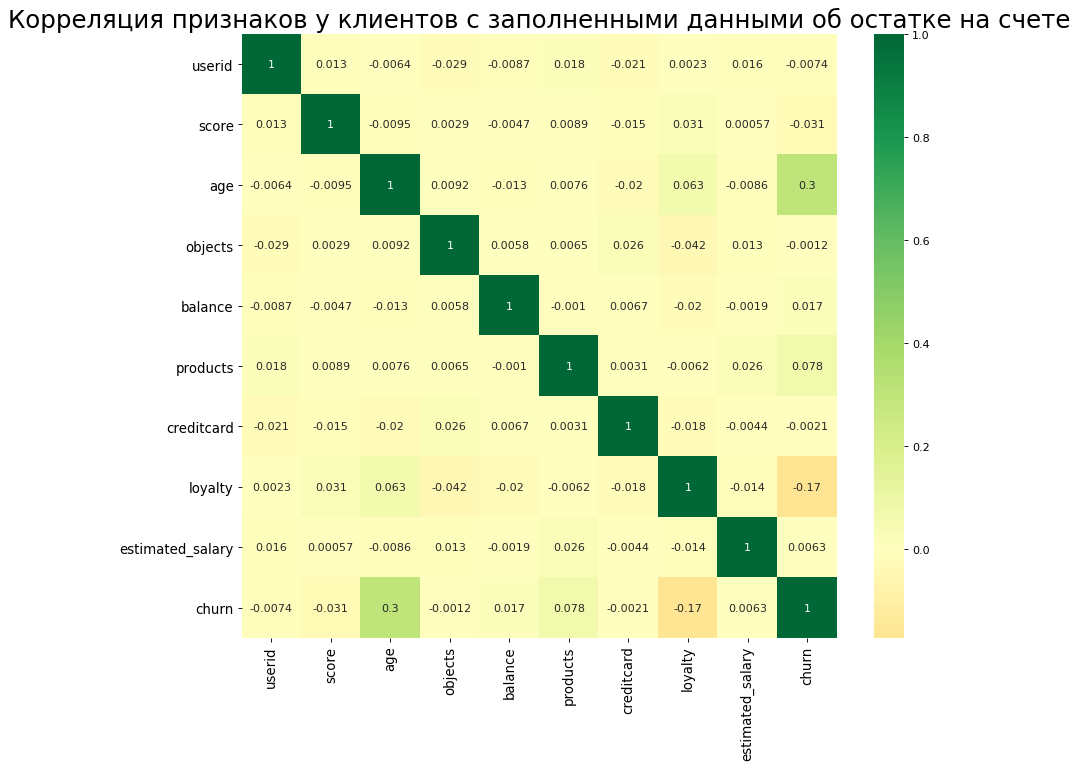

In [35]:
correlation_func(bankset.loc[bankset['balance'].isnull() == False], 'Корреляция признаков у клиентов с заполненными данными об остатке на счете')

у клиентов с заполненными данными об остатках тоже есть корреляция между возрастом и оттоком и обратная корреляция активность-отток, а вот с количеством продуктов явно ни какой другой признак не коррелирует.

Интересно посмотреть отдельно клиентов с нулевым балансом. Возможно, это клиенты-заемщики, у которых нет других счетов в данном банке. Причем среди них большое клиентов с двумя продуктами (?кредитная карта в данном случае будет считаться за отдельный продукт)?

In [36]:
bankset.loc[bankset['balance'].isnull() == True].pivot_table(index='products').style.format('{:.2f}')

,age,churn,creditcard,estimated_salary,loyalty,objects,score,userid
products,,,,,,,,
1,40.71,0.37,0.73,98523.32,0.48,4.96,643.56,15734845.36
2,37.46,0.03,0.71,99046.28,0.53,5.12,651.46,15734259.64
3,41.88,0.63,0.69,99206.20,0.49,4.77,652.63,15744422.44
4,47.86,1.00,0.64,115527.96,0.57,5.21,635.71,15735303.21


у них похожая картина в средних значениях, как и у датасета в целом

In [37]:
bankset.loc[bankset['balance'].isnull() == True].pivot_table(
    index='products', 
    aggfunc = {'userid':'count', 'score':'mean','churn':'mean','age':'mean', 'balance':'mean', 'creditcard':'mean', 'estimated_salary':'mean', 'loyalty':'mean', 'objects':'mean'}).style.format('{:.2f}')


,age,churn,creditcard,estimated_salary,loyalty,objects,score,userid
products,,,,,,,,
1,40.71,0.37,0.73,98523.32,0.48,4.96,643.56,905.00
2,37.46,0.03,0.71,99046.28,0.53,5.12,651.46,2600.00
3,41.88,0.63,0.69,99206.20,0.49,4.77,652.63,98.00
4,47.86,1.00,0.64,115527.96,0.57,5.21,635.71,14.00


Клиенты с нулевым балансом есть во всех четырех группах

## Сравнения групп пользователей по другим признакам
- есть ли различия в распределении признаков в зависимости от пола, города, возраста, активности, баланса на счете, наличия кредитной карты.
- характерные признаки оттока
- 


In [38]:
bankset.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Посмотрю, как меняется среднее значение признаков при различных группировках.

### Группировка по полу

In [39]:
bankset.pivot_table(index='gender', values=[
    'score','age','objects','balance','products','creditcard', 'loyalty','estimated_salary', 'churn'])

,age,balance,churn,creditcard,estimated_salary,loyalty,objects,products,score
gender,,,,,,,,,
Ж,39.238389,118975.601938,0.250715,0.702619,100601.541382,0.502751,4.966102,1.544134,650.831389
М,38.658237,120531.877184,0.164559,0.707898,99664.576931,0.525380,5.051677,1.518600,650.276892


Есть заметная разница в оттоке! Девочек больше на 8,5%.

### Группировка по активности

In [40]:
bankset.pivot_table(index='loyalty', values=[
    'score','age','objects','balance','products','creditcard','estimated_salary', 'churn']).style.format('{:.2f}')

,age,balance,churn,creditcard,estimated_salary,objects,products,score
loyalty,,,,,,,,
0,38.00,120458.81,0.27,0.71,100767.20,5.10,1.52,647.97
1,39.79,119229.50,0.14,0.70,99452.97,4.93,1.54,652.93


Есть заметная разница в оттоке! Неактивных больше на 12%, что логично. Странно, что разница не больше.

### Группировка по количеству продуктов

In [41]:
bankset.pivot_table(index='products', values=[
    'score','age','objects','balance','loyalty','creditcard','estimated_salary', 'churn', 'gender'],
                   aggfunc = 'mean').style.format('{:.2f}')

,age,balance,churn,creditcard,estimated_salary,loyalty,objects,score
products,,,,,,,,
1,39.67,119894.16,0.28,0.70,99487.26,0.50,4.97,649.12
2,37.75,119660.94,0.08,0.71,100452.01,0.53,5.05,652.19
3,43.20,119475.69,0.83,0.71,104318.13,0.42,5.00,648.11
4,45.68,122260.61,1.00,0.68,104763.72,0.48,5.30,653.58


Интересно, как только клиент приобретает четвертый продукт, он перестает быть клиентом банка (средний отток = 1, то есть все ушли). Что-то ужасное им продали...

In [42]:
#интересно также медианные значения посмотреть

bankset.pivot_table(index='products', values=[
    'score','age','objects','balance','loyalty','creditcard','estimated_salary', 'churn', 'gender'],
                   aggfunc = 'median')

,age,balance,churn,creditcard,estimated_salary,loyalty,objects,score
products,,,,,,,,
1,38,119919.120,0,1,99226.830,1,5,651
2,36,119762.245,0,1,100738.855,1,5,653
3,42,118118.190,1,1,101046.885,0,5,650
4,45,120968.270,1,1,112163.105,0,5,643


In [43]:
bankset.loc[bankset['products'] == 4].describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,6.000000e+01,60.000000,60.000000,60.000000,46.000000,60.0,60.000000,60.000000,60.000000,60.0
mean,1.571936e+07,653.583333,45.683333,5.300000,122260.610870,4.0,0.683333,0.483333,104763.723333,1.0
std,6.814840e+04,101.265600,8.619040,2.947564,27761.150772,0.0,0.469102,0.503939,57526.494114,0.0
min,1.561074e+07,376.000000,29.000000,1.000000,46870.430000,4.0,0.000000,0.000000,5669.310000,1.0
25%,1.566638e+07,595.000000,40.000000,2.750000,112063.295000,4.0,0.000000,0.000000,62033.390000,1.0
50%,1.570775e+07,643.000000,45.000000,5.000000,120968.270000,4.0,1.000000,0.000000,112163.105000,1.0
75%,1.576341e+07,708.000000,50.250000,8.000000,135527.207500,4.0,1.000000,1.000000,139371.955000,1.0
max,1.585805e+07,850.000000,68.000000,10.000000,195238.290000,4.0,1.000000,1.000000,198874.520000,1.0


В разделе "Сегментация" я подробнее буду смотреть различные срезы и группировки по количеству продуктов. Пока поудивляюсь тому факту, что начинася с 3-х продуктов клиент стремится убежать.

### Корреляция

Посмотрю корреляцию по всем признакам:

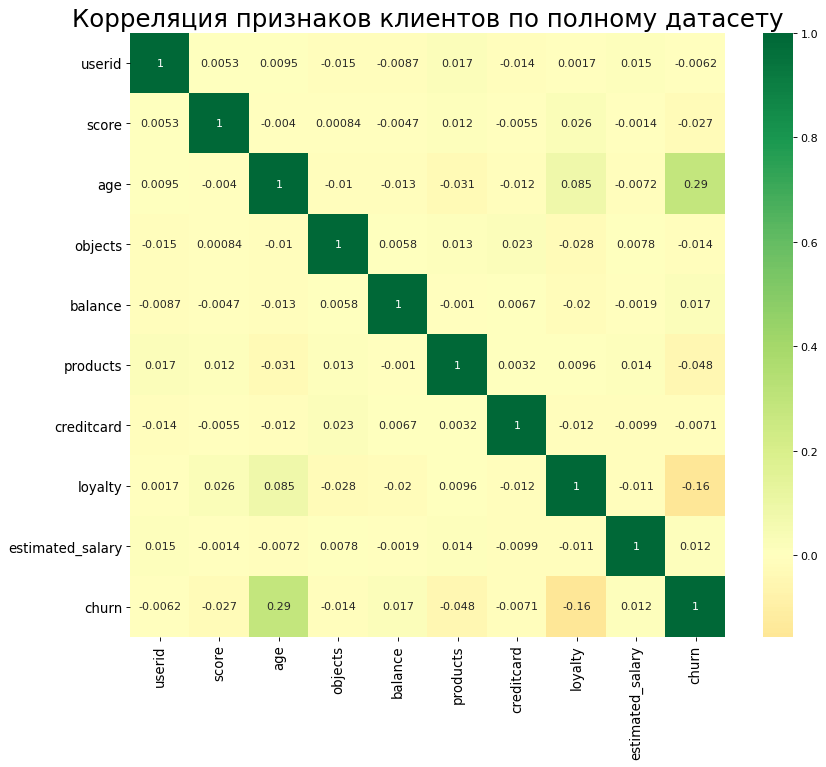

In [44]:
correlation_func(bankset, 'Корреляция признаков клиентов по полному датасету')

Ну мало-мало. Немножко возраст с оттоком коррелирует. Попробую выделить возрастные группы и по ним посмотреть признаки.
И снова обратная корреляция оттока с активностью - что понятно. Количество продуктов мало коррелирует со всеми остальными признаками.

### Группировка по возрасту

Поделю клиентов по возрасту на группу Age1 - до 30, Age2 - с 30 до 60, Age3 - cтарше 60. 

In [45]:
bankset.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [46]:
def age_group(age):
    """
    Возвращает возрастную группу по критериям: Age1 - до 30, Age2 - с 30 до 60, Age3 - cтарше 60  
    """
    if age < 30:
        return'age1_30'
    if age < 60:
        return 'age2_30-60'
    return 'age3_60+'

bankset['age_group'] = bankset['age'].apply(age_group)
bankset.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_group
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,age2_30-60
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,age2_30-60
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,age2_30-60
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,age2_30-60
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,age2_30-60


In [47]:
age_groups1 = bankset.groupby('age_group').mean().reset_index()
age_groups1

,age_group,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,age1_30,1.573207e+07,651.140768,25.925655,5.101158,121181.961202,1.556977,0.714199,0.510055,100855.247818,0.075564
1,age2_30-60,1.573399e+07,650.198519,39.784118,4.998596,119682.714487,1.525980,0.703434,0.497766,100099.738311,0.225456
2,age3_60+,1.573408e+07,653.538023,66.625475,4.948669,117974.887881,1.509506,0.709125,0.788973,97562.142490,0.279468


In [48]:
age_groups2 = bankset.groupby('age_group')['userid'].count().reset_index()
age_groups2

,age_group,userid
0,age1_30,1641
1,age2_30-60,7833
2,age3_60+,526


In [49]:
age_groups2.merge(age_groups1, on='age_group', how = 'right').drop(
    ['userid_y','score','age',"balance","objects","creditcard","estimated_salary"],axis=1).set_index('age_group').rename(
    mapper={'userid_x':'Колво-клиентов', "products":"Среднее кол-во продуктов", 'loyalty':'Активность',
           "churn":"Отток"}, axis=1).style.format('{:.2f}')

,Колво-клиентов,Среднее кол-во продуктов,Активность,Отток
age_group,,,,
age1_30,1641.00,1.56,0.51,0.08
age2_30-60,7833.00,1.53,0.50,0.23
age3_60+,526.00,1.51,0.79,0.28


Так, доля оттока увеличивается с возрастом...может,клиенты просто умирают?)))

In [50]:
bankset.groupby(['age_group','churn'])['userid'].count()

age_group   churn
age1_30     0        1517
            1         124
age2_30-60  0        6067
            1        1766
age3_60+    0         379
            1         147
Name: userid, dtype: int64

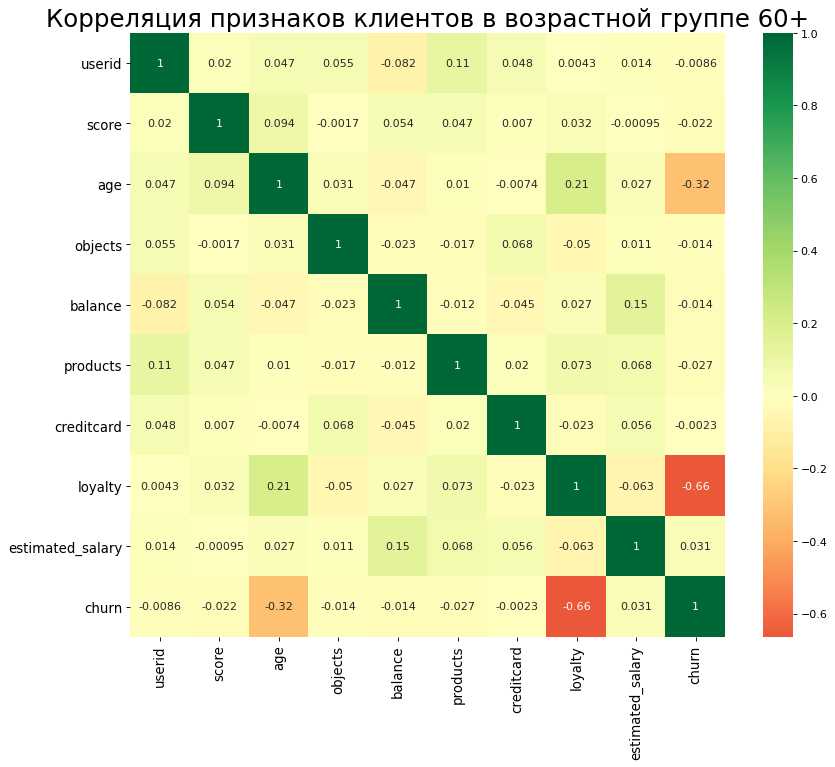

In [51]:
correlation_func(bankset.loc[bankset['age_group'] == 'age3_60+'], 'Корреляция признаков клиентов в возрастной группе 60+')

В старшей группе (60+) корреляция между оттоком и возрастом обратная (-0.3), и большая обратная корреляция между активностью и оттоком (-0.66). То есть если клиент до пенсии остался с банком, то он более склонен остаться клиентом и дальше и пользоваться продуктами банка активнее.
По признаку активности можно выявлять клиентов с риском оттока на ранней стадии.
Колличество продуктов опять же ни на что не влияет...

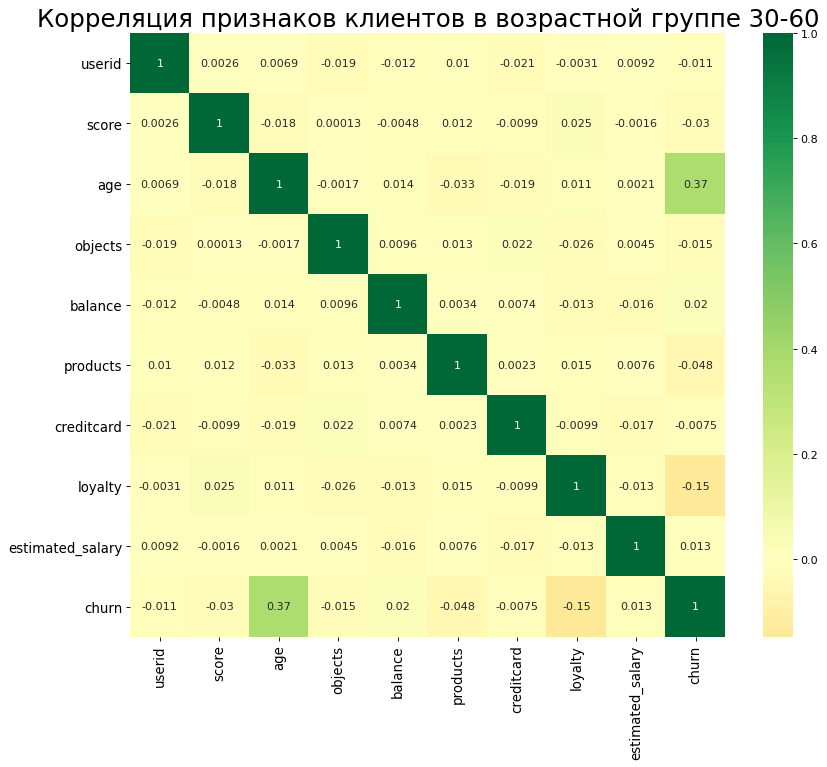

In [52]:
correlation_func(bankset.loc[bankset['age_group'] == 'age2_30-60'], 'Корреляция признаков клиентов в возрастной группе 30-60')

В возрастной группе 30-60 заметная положительная корреляция между возрастом и оттоком (0.37). Предположительно, с течением возраста клиенты уходят из заплатного проекта (меняют работу и банк). 
Есть небольшая обратная корреляция с активностью.

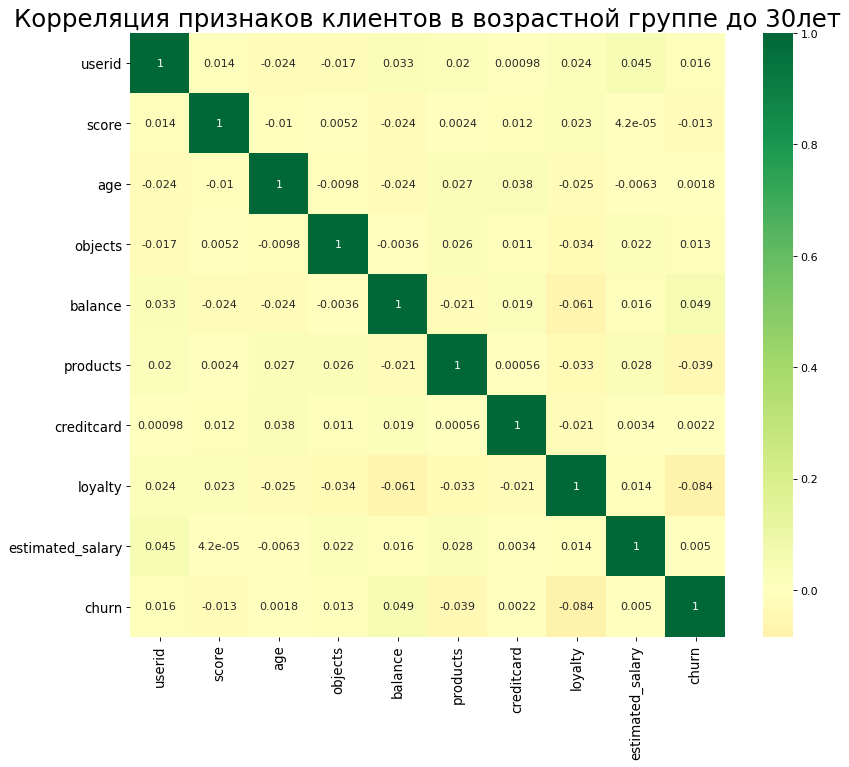

In [53]:
correlation_func(bankset.loc[bankset['age_group'] == 'age1_30'], 'Корреляция признаков клиентов в возрастной группе до 30лет')

До 30 лет вообще никаких корреляций...

### Группировка по количеству объектов

Посмотрю, появляется ли корреляция в срезах клиентов в зависимости от количества продуктов. Для простоты построю все кореляшки циклом:

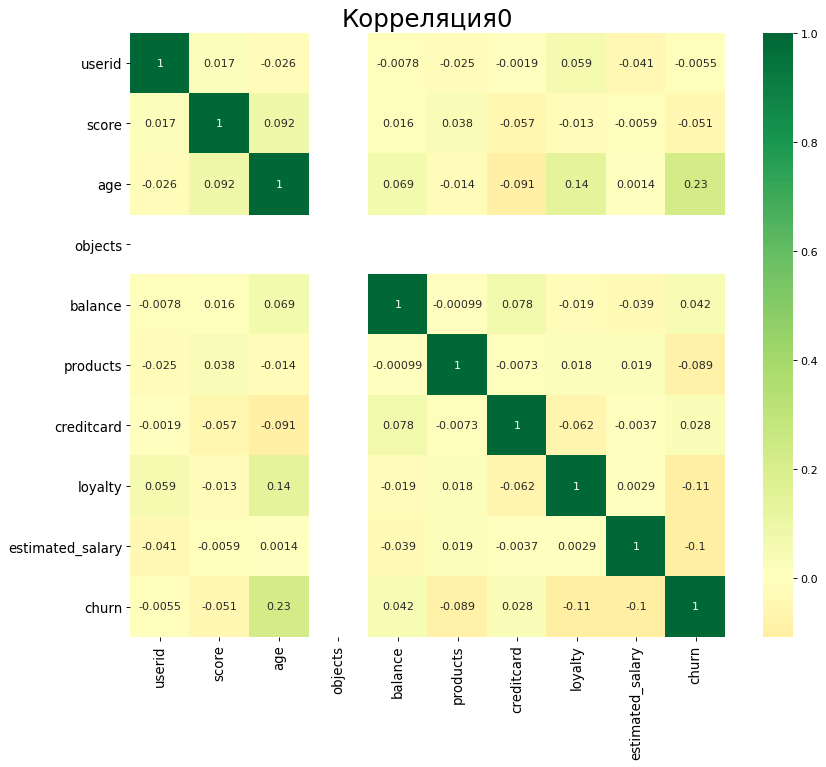

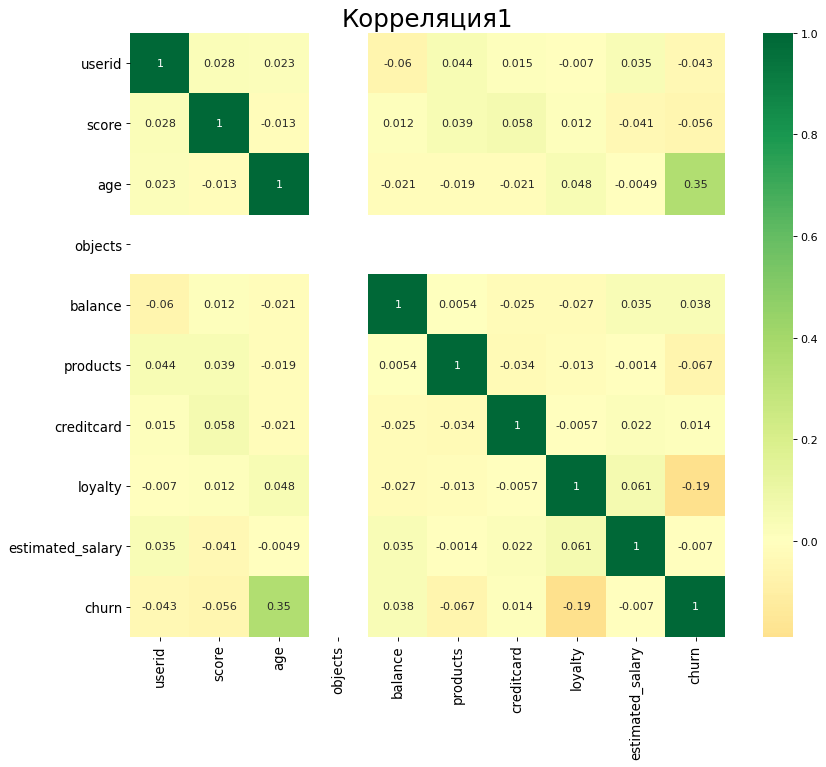

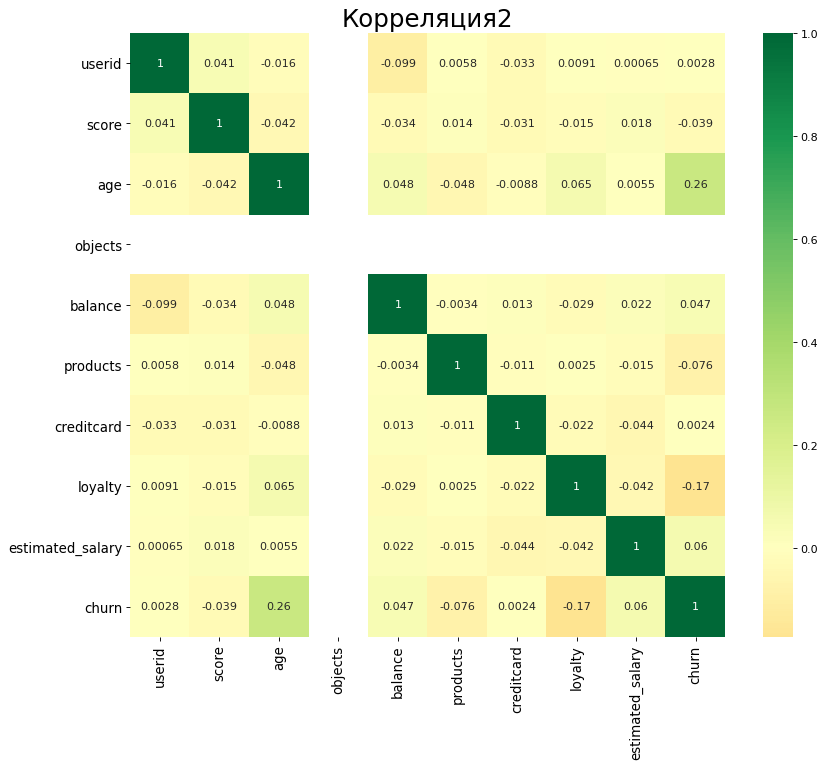

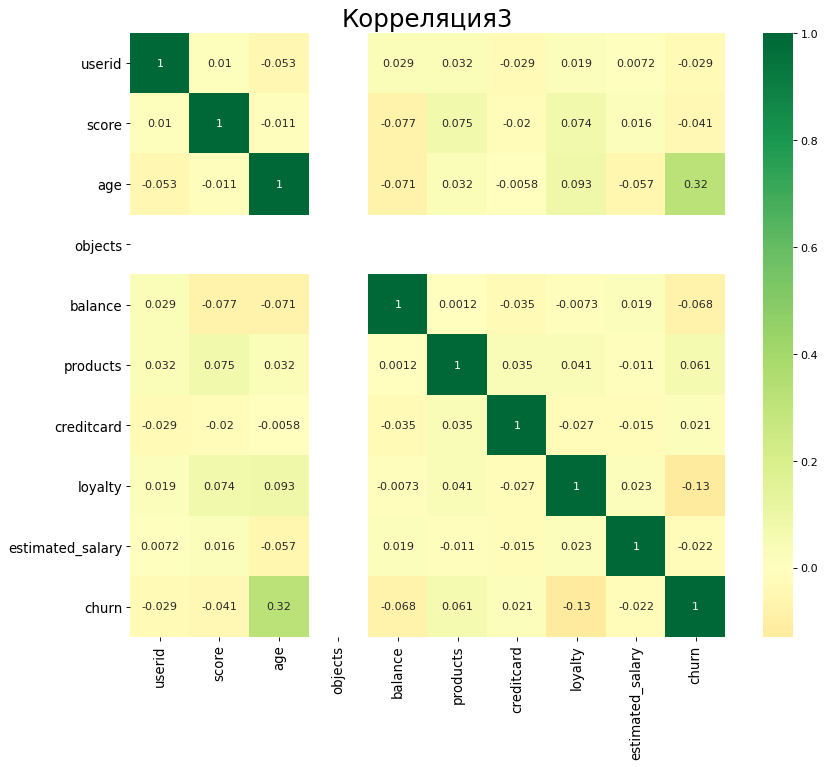

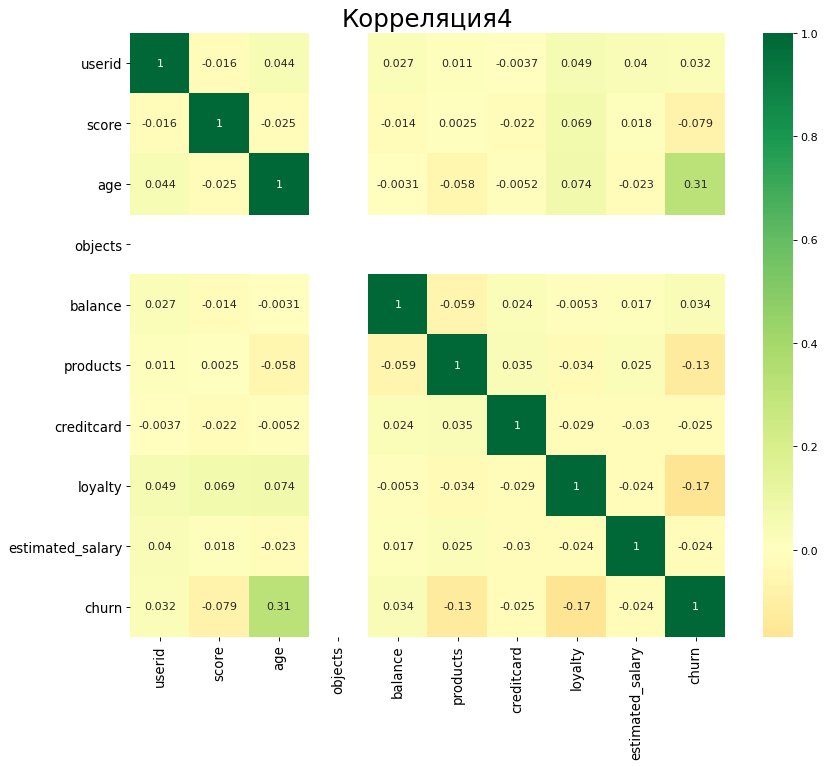

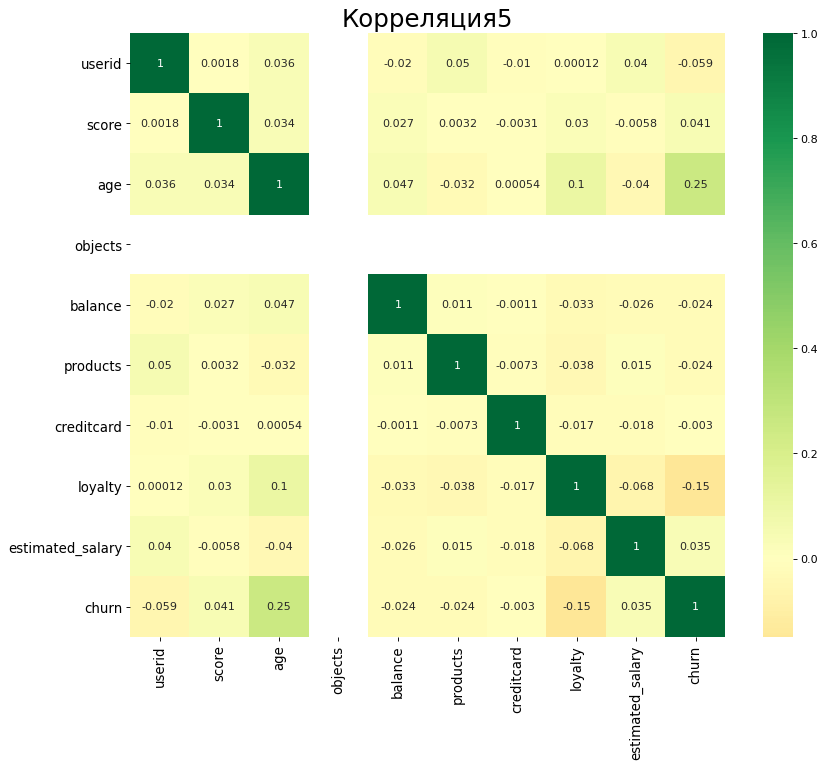

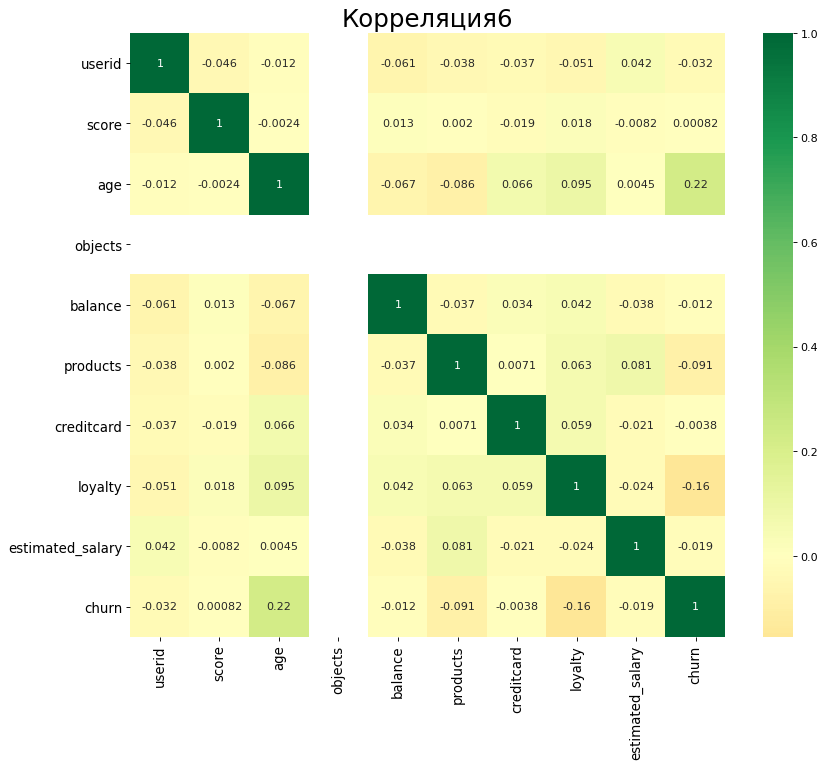

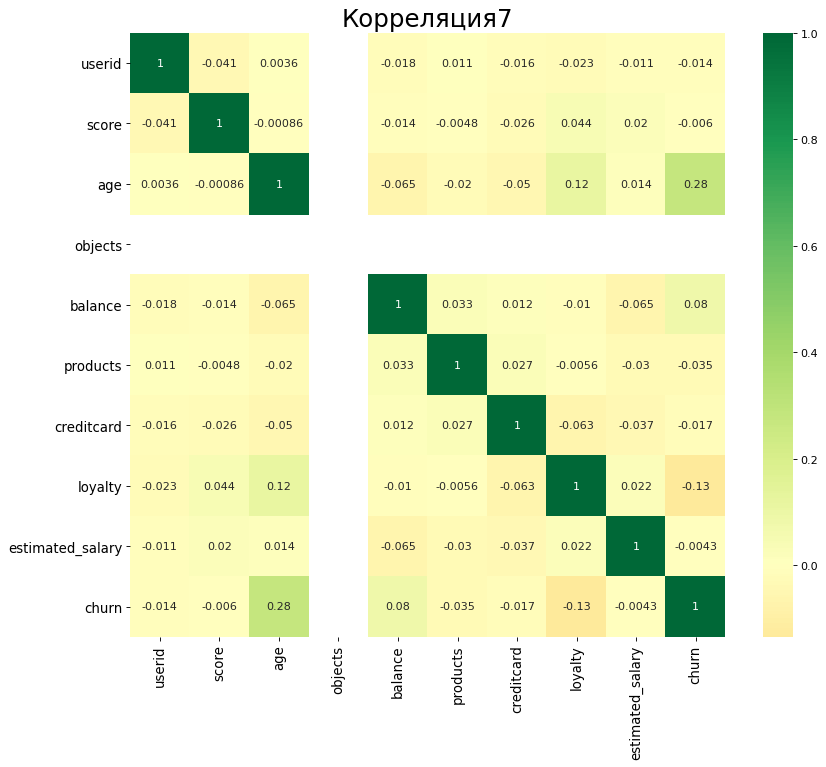

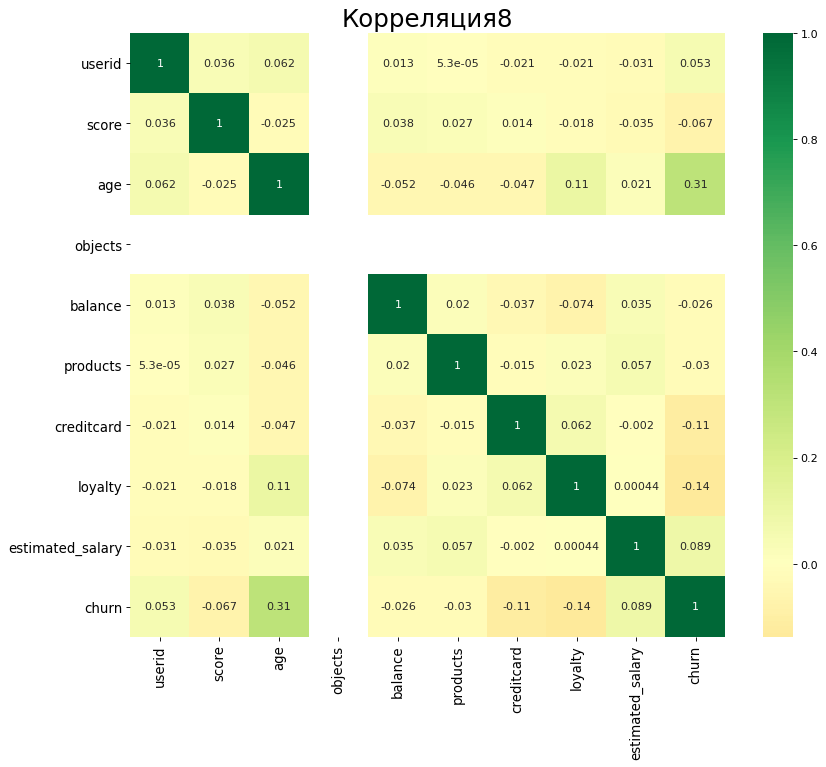

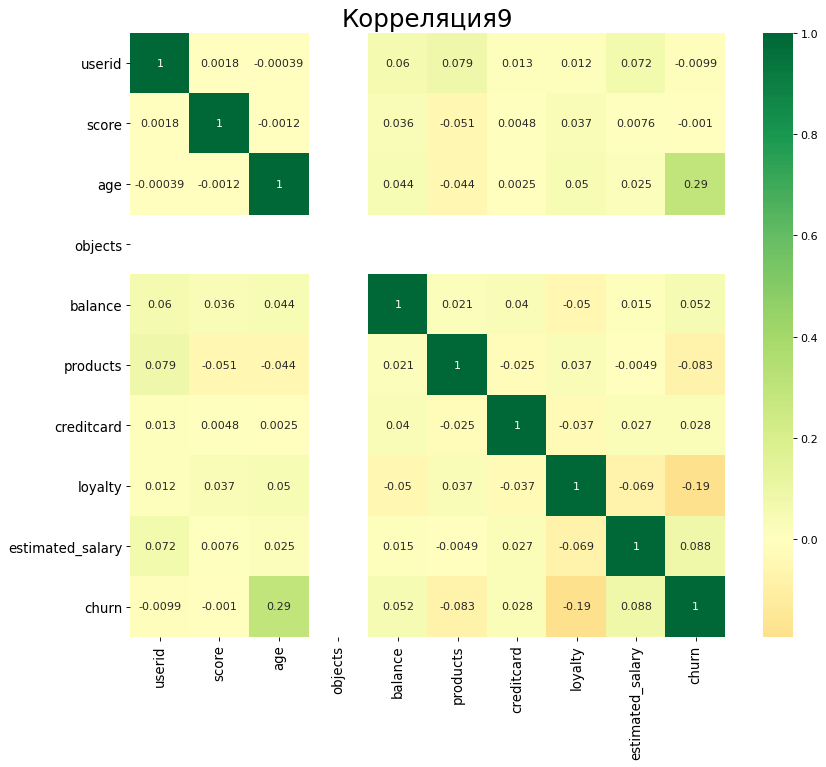

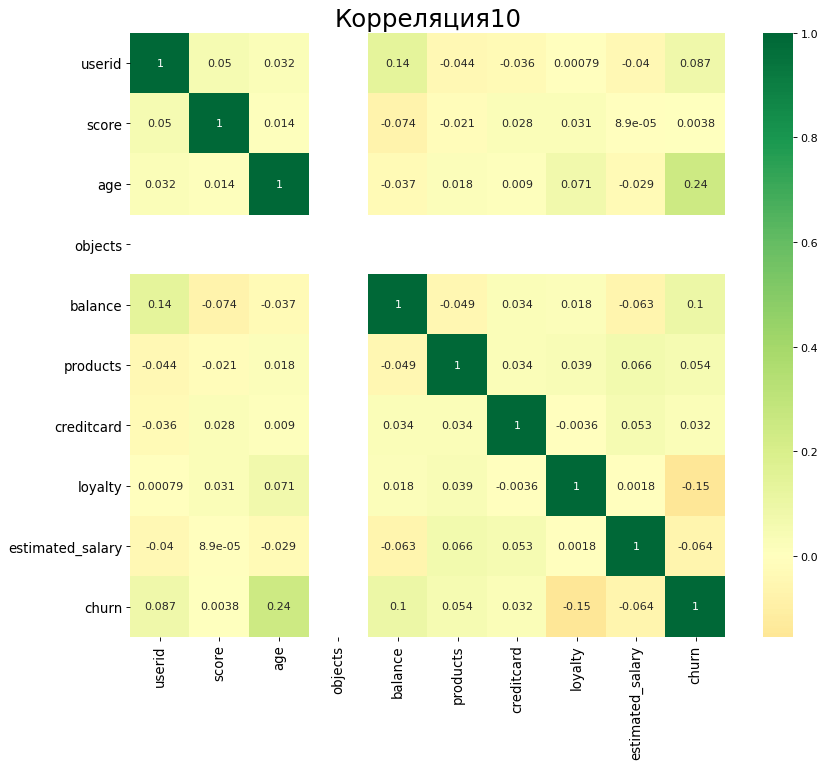

In [54]:
for i in range(0,11):
    correlation_func(bankset.loc[bankset['objects'] == i], 'Корреляция'+str(i))

Для 0-6 и для 9-10 объектов ничего нового - есть небольшая корреляция между оттоком и возрастом и оттоком и активностью. Начиная с 7 объектов проявились новые корреляции: 7продуктов - активность-возраст (+), 8 продуктов - отток-кредитная карта (-). Впрочем, дальше эта корреляция пропала, так что не буду включать это в вывод, ничего интересно тут нет. 

### Группировка по городам

Сравним средние значения показателей по городам:

In [58]:
bankset.pivot_table(index='city', 
        values=['age', 'balance', 'churn', 'creditcard', 'estimated_salary','loyalty', 'products','score'],
        ).T.style.format('{:.2f}')

city,Ростов Великий,Рыбинск,Ярославль
age,39.77,38.89,38.51
balance,119730.12,119814.99,119927.77
churn,0.32,0.17,0.16
creditcard,0.71,0.69,0.71
estimated_salary,101113.44,99440.57,99899.18
loyalty,0.50,0.53,0.52
products,1.52,1.54,1.53
score,651.45,651.33,649.67


Различий немного, в Ростове Великом заметно больше доля оттока (0.32 против 0.16 в двух других городах).

Посмотрим на данные в разрезе городов - есть ли какие-то отличия.

In [60]:
bankset['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

In [71]:
for i in bankset['city'].unique():
    print(i)
    print(bankset[bankset['city'] == i].describe(include='all'))

Ярославль
              userid        score       city gender          age      objects  \
count   5.014000e+03  5014.000000       5014   5014  5014.000000  5014.000000   
unique           NaN          NaN          1      2          NaN          NaN   
top              NaN          NaN  Ярославль      М          NaN          NaN   
freq             NaN          NaN       5014   2753          NaN          NaN   
mean    1.573339e+07   649.668329        NaN    NaN    38.511767     5.004587   
std     7.137584e+04    97.016799        NaN    NaN    10.469459     2.888475   
min     1.560845e+07   350.000000        NaN    NaN    18.000000     0.000000   
25%     1.567134e+07   582.000000        NaN    NaN    31.000000     2.000000   
50%     1.573351e+07   653.000000        NaN    NaN    37.000000     5.000000   
75%     1.579491e+07   717.000000        NaN    NaN    43.000000     7.000000   
max     1.585840e+07   850.000000        NaN    NaN    92.000000    10.000000   

              bal

Интересно, что у клиентов из Ростова Великого полностью заполнен столбец Balance, а у клиентов в других городах есть пропуски в этом столбце.

### Группировка по наличию кредитной карты

In [72]:
bankset.pivot_table(index='creditcard', 
        values=['age', 'balance', 'churn', 'estimated_salary','loyalty', 'products','score', 'objects'],
                    aggfunc='mean').T.style.format('{:.2f}')

creditcard,0,1
age,39.11,38.84
balance,119519.12,119960.16
churn,0.21,0.20
estimated_salary,100974.40,99721.16
loyalty,0.52,0.51
objects,4.91,5.05
products,1.53,1.53
score,651.35,650.19


Нельзя сказать, что наличие карты на что-то влияет...

### Группировка по доходу

Разделим клиентов на группы по доходу

In [73]:
def salary_grouper(salary):
    """
    Возвращает группу по доходу по критериям: 1: 50000, 2: 50-100 тыс, 3: 100-150, 4: 150-200 тыс  
    """
    if salary < 50000:
        return 1
    if salary < 100000:
        return 2
    if salary < 150000:
        return 3
    return 4

bankset['salary_group'] = bankset['estimated_salary'].apply(salary_grouper)
bankset.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_group,salary_group
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,age2_30-60,3
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,age2_30-60,3
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,age2_30-60,3
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,age2_30-60,2
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,age2_30-60,2


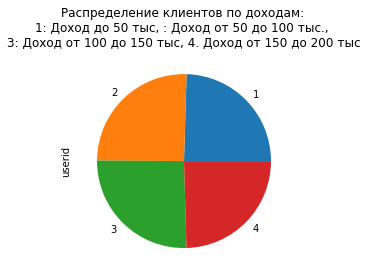

In [74]:
bankset.groupby('salary_group')['userid'].count().plot(kind='pie')#, main='Распределение клиентов по доходам: 1: Доход до 50 тыс, \2: Доход от 50 до 100 тыс., 3: Доход от 100 до 150 тыс, 4. Доход от 150 до 200 тыс');
plt.title('Распределение клиентов по доходам: \n1: Доход до 50 тыс, : Доход от 50 до 100 тыс., \n3: Доход от 100 до 150 тыс, 4. Доход от 150 до 200 тыс')
plt.show()

## Группировка по оттоку

In [75]:
bankset.pivot_table(index=['churn'], 
        values=['age', 'balance', 'creditcard', 'estimated_salary','loyalty', 'score', 'objects','products'],
                    aggfunc='mean').T.style.format('{:.2f}')

churn,0,1
age,37.41,44.84
balance,119535.86,120746.97
creditcard,0.71,0.70
estimated_salary,99738.39,101465.68
loyalty,0.55,0.36
objects,5.03,4.93
products,1.54,1.48
score,651.85,645.35


Ничего нового не замечаю: у оттока выше возраст, ниже активность.

# Сегментация

Сегментируем пользователей на основе данных о количестве потребляемых продуктов

## Распределение клиентов по количеству потребляемых продуктов

In [76]:
bankset['products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

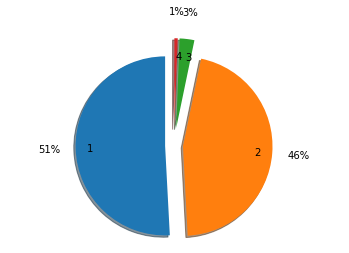

In [77]:
labels = '1','2','3','4'
explode = (0.1,0.1,0.2,0.2)
fig1, ax1 = plt.subplots()
ax1.pie(bankset['products'].value_counts(), explode = explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90, labeldistance = 0.8, pctdistance = 1.3)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

По количеству используемых продуктов клиенты распределяются следующим образом: 51% клиентов используют 1 продукт, 46% - использут 2 продукта. 3 или 4 продукта используют чуть более 3% клиентов.

In [78]:
326/10000

0.0326

## Доля оттока и доля клиентов с балансом

Сначала посмотрю долю оттока и долю клиентов без остатка на счете в разрезе количества продуктов:

In [79]:
churn2 = bankset.groupby(['products']).agg({'churn':'mean', 'userid':'count','balance':'count'}).reset_index()
churn2

,products,churn,userid,balance
0,1,0.277144,5084,4179
1,2,0.075817,4590,1990
2,3,0.827068,266,168
3,4,1.000000,60,46


In [80]:
churn2['balance_share'] = churn2['balance']/churn2['userid']
churn2.rename(mapper = {'products':'Кол-во продуктов','churn':"Доля оттока", 'userid':'Кол-во клиентов',
                       "balance":"Клиенты с остатком на счете", "balance_share":"Доля клиентов с остатком на счете"}, 
              axis=1).set_index('Кол-во продуктов').style.format('{:.2f}')

,Доля оттока,Кол-во клиентов,Клиенты с остатком на счете,Доля клиентов с остатком на счете
Кол-во продуктов,,,,
1,0.28,5084.00,4179.00,0.82
2,0.08,4590.00,1990.00,0.43
3,0.83,266.00,168.00,0.63
4,1.00,60.00,46.00,0.77


Сделаю ещё сводную таблицу с группировкой по количеству продуктов

In [81]:
bankset.pivot_table(
    index='products', 
    aggfunc = {'userid':'count', 'score':'mean','churn':'mean','age':'mean', 'balance':'mean', 'creditcard':'mean', 'estimated_salary':'mean', 'loyalty':'mean', 'objects':'mean'}).style.format('{:.2f}')

#'age', 'balance', 'creditcard', 'estimated_salary', 'loyalty', 'objects', 'score'

,age,balance,churn,creditcard,estimated_salary,loyalty,objects,score,userid
products,,,,,,,,,
1,39.67,119894.16,0.28,0.70,99487.26,0.50,4.97,649.12,5084.00
2,37.75,119660.94,0.08,0.71,100452.01,0.53,5.05,652.19,4590.00
3,43.20,119475.69,0.83,0.71,104318.13,0.42,5.00,648.11,266.00
4,45.68,122260.61,1.00,0.68,104763.72,0.48,5.30,653.58,60.00


по размеру выделяются две группы - с одним продуктом и с двумя продуктами. Клиенты с 3-4 продуктами малочисленны (вместе они составляют ок 3% от датасета), но у группы с 4 продуктами 100% отток, этим она интересна, и у группа с 3 продуктами тоже высокая доля оттока.

Доля оттока на 20% меньше у клиентов с двумя продуктами по сравнению с клиентами с одним продуктом.

Вторая группа более молодая и более активная, чем все остальные.

Доля клиентов с балансом отличается, но затрудняюсь сделать выводы из этого. Например, больше всего клиентов без баланса имеют два продукта. Что это значит? Что они взяли кредит и что-то ещё из продуктов банка? Ну возможно. И при этом у них самая низкая доля оттока. С кредитом на руках далеко не убежишь...

## Статистические показатели по группам

далее следуют четыре таблички, которые можно было бы как-то красиво визуализирвоать, но я не сообразила как и посмотрела на всё глазами

In [82]:
group1 = bankset.query('products == 1').describe()
group1 = group1[['score','age','objects','balance','creditcard','loyalty','estimated_salary','churn']]
group1

,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
count,5084.000000,5084.000000,5084.000000,4179.000000,5084.000000,5084.000000,5084.000000,5084.000000
mean,649.120968,39.673092,4.974626,119894.163723,0.703777,0.504131,99487.256851,0.277144
std,97.203710,10.659566,2.914269,29804.134035,0.456636,0.500032,57363.626412,0.447632
min,350.000000,18.000000,0.000000,12459.190000,0.000000,0.000000,11.580000,0.000000
25%,581.000000,32.000000,2.000000,100440.185000,0.000000,0.000000,50414.515000,0.000000
50%,651.000000,38.000000,5.000000,119919.120000,1.000000,1.000000,99226.830000,0.000000
75%,717.000000,45.000000,7.000000,139442.110000,1.000000,1.000000,148212.695000,1.000000
max,850.000000,92.000000,10.000000,238387.560000,1.000000,1.000000,199970.740000,1.000000


In [83]:
group2 = bankset.query('products == 2').describe()
group2 = group2[['score','age','objects','balance','creditcard','loyalty','estimated_salary','churn']]
group2

,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
count,4590.000000,4590.000000,4590.000000,1990.000000,4590.000000,4590.000000,4590.000000,4590.000000
mean,652.188671,37.753595,5.051852,119660.944362,0.707190,0.532898,100452.012821,0.075817
std,96.066831,10.145663,2.867741,30647.376666,0.455102,0.498971,57790.799984,0.264734
min,350.000000,18.000000,0.000000,3768.690000,0.000000,0.000000,90.070000,0.000000
25%,586.000000,31.000000,3.000000,99179.367500,0.000000,0.000000,50797.287500,0.000000
50%,653.000000,36.000000,5.000000,119762.245000,1.000000,1.000000,100738.855000,0.000000
75%,719.000000,42.000000,7.000000,139556.932500,1.000000,1.000000,150151.460000,0.000000
max,850.000000,92.000000,10.000000,214346.960000,1.000000,1.000000,199992.480000,1.000000


In [84]:
group3 = bankset.query('products == 3').describe()
group3 = group3[['score','age','objects','balance','creditcard','loyalty','estimated_salary','churn']]
group3

,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
count,266.000000,266.000000,266.000000,168.000000,266.000000,266.000000,266.000000,266.000000
mean,648.105263,43.195489,5.003759,119475.686310,0.714286,0.424812,104318.130564,0.827068
std,95.190396,10.422008,2.879332,31504.871935,0.452606,0.495246,55464.281426,0.378902
min,358.000000,21.000000,0.000000,43772.660000,0.000000,0.000000,3440.470000,0.000000
25%,586.000000,36.000000,3.000000,100741.587500,0.000000,0.000000,64344.800000,1.000000
50%,650.000000,42.000000,5.000000,118118.190000,1.000000,0.000000,101046.885000,1.000000
75%,711.000000,50.000000,8.000000,139714.815000,1.000000,1.000000,152230.195000,1.000000
max,850.000000,77.000000,10.000000,250898.090000,1.000000,1.000000,199357.240000,1.000000


In [85]:
group4 = bankset.query('products == 4').describe()
group4 = group4[['score','age','objects','balance','creditcard','loyalty','estimated_salary','churn']]
group4

,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
count,60.000000,60.000000,60.000000,46.000000,60.000000,60.000000,60.000000,60.0
mean,653.583333,45.683333,5.300000,122260.610870,0.683333,0.483333,104763.723333,1.0
std,101.265600,8.619040,2.947564,27761.150772,0.469102,0.503939,57526.494114,0.0
min,376.000000,29.000000,1.000000,46870.430000,0.000000,0.000000,5669.310000,1.0
25%,595.000000,40.000000,2.750000,112063.295000,0.000000,0.000000,62033.390000,1.0
50%,643.000000,45.000000,5.000000,120968.270000,1.000000,0.000000,112163.105000,1.0
75%,708.000000,50.250000,8.000000,135527.207500,1.000000,1.000000,139371.955000,1.0
max,850.000000,68.000000,10.000000,195238.290000,1.000000,1.000000,198874.520000,1.0


Четвертая группа выделяется тем, что при максимальном количестве продуктов в ней 100% отток, а в группе с тремя продуктами - 83% оттока. Логично предположить, что клиенты из этих групп изначально приобрели какой-то срочный продукт, например, взяли кредит/ипотеку, к этому продукту были привязаны другие продукты банка (расчетный счет, дебетовая/кредитная карта, страховка от мошенничества и т.п.), и с выплатой кредита/ипотеки они отказались и от всех остальных продуктов. 

Конечно, знание, какие именно продукты приобретались клиентами, было бы не лишним в этом проекте. С другой стороны, группы с 3 и 4 продуктами вместе составляют всего 3% от датасета. Поэтому какие-то обоснованные выводы можно делать только по первым двум группам.

Насчет группы клиентов с 3-4 продуктами можно уверенно сказать, что продажа дополнительных продуктов не привела к лояльности и не помогла удержать этих клиентов. Костяк клиентской базы составляют клиенты, пользующиеся одним или двуми продуктами банка, и использование двух продуктов явно снижает вероятность оттока клиента.

Для удобства дальнейшего сравнения оставлю датасет только с одним и двумя продуктами

In [86]:
bankset_cut = bankset.query('products == 1 or products == 2')
bankset_cut

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_group,salary_group
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,age2_30-60,3
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,age2_30-60,3
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,age2_30-60,2
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,age2_30-60,2
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,age2_30-60,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0,age2_30-60,2
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0,age2_30-60,3
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1,age2_30-60,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1,age2_30-60,2


Проверю попарно клиентов с т.з. баланса и продукта

In [87]:
bankset_cut.loc[bankset['balance'].isnull() == True].groupby('products').mean().style.format('{:.2f}')

,userid,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn,salary_group
products,,,,,,,,,,
1,15734845.36,643.56,40.71,4.96,nan,0.73,0.48,98523.32,0.37,2.47
2,15734259.64,651.46,37.46,5.12,nan,0.71,0.53,99046.28,0.03,2.48


In [88]:
bankset_cut.loc[bankset['balance'].isnull() == False].groupby('products').mean().style.format('{:.2f}')

,userid,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn,salary_group
products,,,,,,,,,,
1,15731831.38,650.32,39.45,4.98,119894.16,0.70,0.51,99696.01,0.26,2.49
2,15735601.69,653.15,38.14,4.96,119660.94,0.70,0.53,102288.65,0.13,2.54


In [89]:
bankset_cut.groupby('products').mean().style.format('{:.2f}')

,userid,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn,salary_group
products,,,,,,,,,,
1,15732367.90,649.12,39.67,4.97,119894.16,0.70,0.50,99487.26,0.28,2.49
2,15734841.49,652.19,37.75,5.05,119660.94,0.71,0.53,100452.01,0.08,2.51


### Корреляции phik

In [90]:
pip install phik==0.10.0

Note: you may need to restart the kernel to use updated packages.


In [91]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [92]:
bankset.drop(['age_group','salary_group'], axis=1, inplace=True)

interval columns not set, guessing: ['userid', 'score', 'age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn']


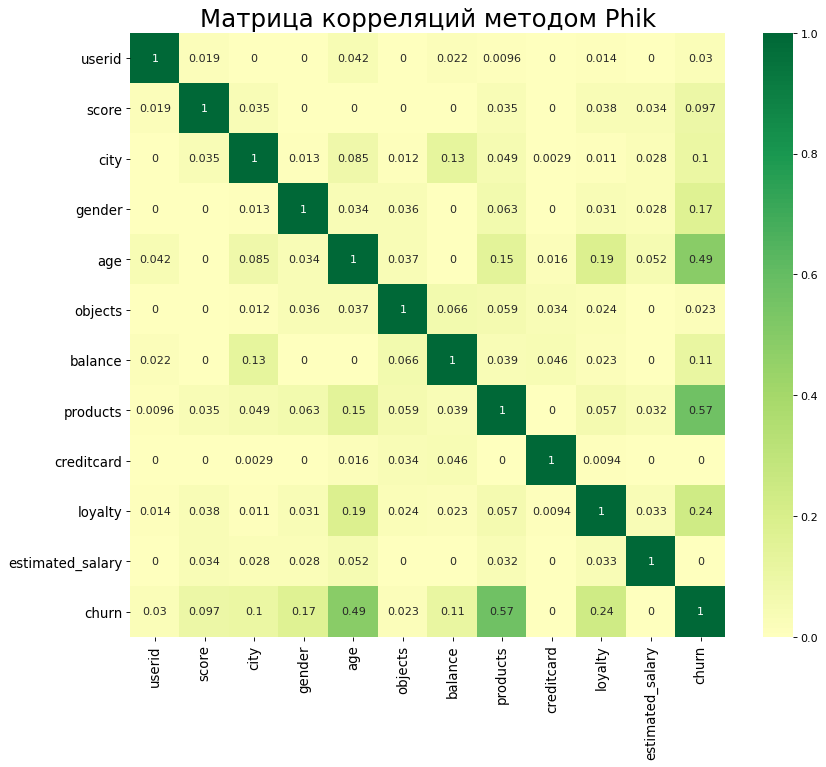

In [93]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(bankset.phik_matrix(), xticklabels=bankset.columns,yticklabels=bankset.columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица корреляций методом Phik', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [94]:
# plot_correlation_matrix(bankset.phik_matrix().round(2), 
#                         x_labels=bankset.columns, 
#                         y_labels=bankset.index, 
#                         vmin=0, vmax=1, color_map="Greens", 
#                         title="title", 
#                         fontsize_factor=1.5, 
#                         figsize=(10, 8))
# plt.tight_layout()

interval columns not set, guessing: ['userid', 'score', 'age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn']


<Figure size 960x800 with 0 Axes>

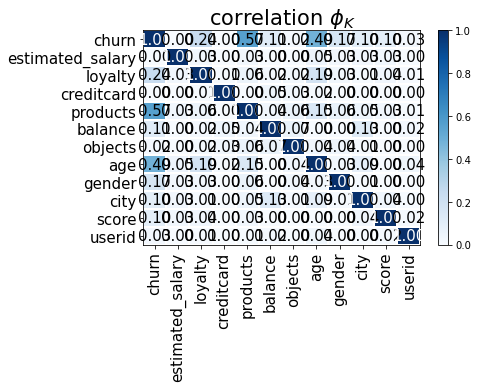

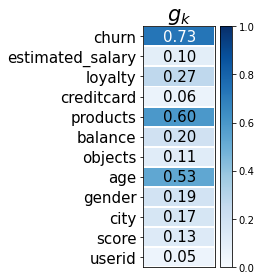

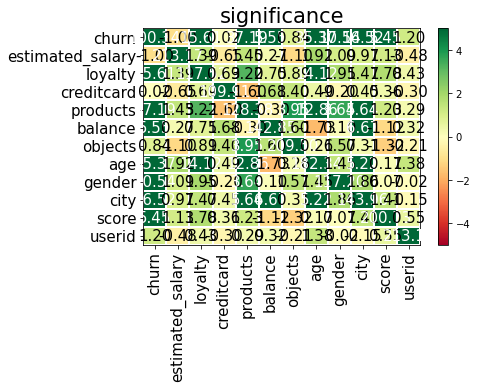

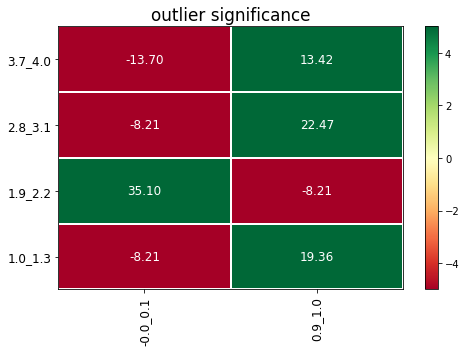

In [95]:
plt.figure(figsize=(12,10), dpi= 80)
rep = report.correlation_report(bankset, significance_threshold=3, correlation_threshold=0.5)
plt.show()

В новой матрице получилось всё тоже самое - отток немного зависит от возраста, количества продуктов и активности.

Проявились небольшие влияния (выше 0.1): город-остаток на счете, кол-во продуктов и активность с возрастом, пол и отток (я же видела, что девочки чаще уходят!) :) 

# Проверка стат гипотез

## Гипотеза 1
*Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*
Формулировка гипотезы, проверка, вывод.

Обратим внимание на то,что данные о доходе клиентов не имеют нормального распределения (что странно), но это распределение визуально похоже во всех срезах. Проверим гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Средний доход клиентов с одним продуктом: 99487 

Средний доход клиентов с двумя продуктами: 100452

Формулировка гипотезы: 


Нулевая гипотеза: Средний доход клиентов с одним продуктом равен среднему доходу клиентов с двумя продуктами

Альтернативная гипотеза: Средний доход клиентов с одним продуктом отличается от среднего дохода клиентов с двумя продуктами

In [96]:
#равество среднего двух генеральных совокупностей по взятым их них выборкам

from scipy import stats as st
sample_1 = bankset.query('products == 1')['estimated_salary']
sample_2 = bankset.query('products == 2')['estimated_salary']

alpha = 0.05 

results = st.ttest_ind(sample_1, sample_2, equal_var = True) #есть основания, что выборки из схожих совокупностей
                                                            #поэтому считаю дисперсии совокупностей равными

print('p-значение: {:.2}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.41
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средний доход клиентов с одним и двумя продуктами не одинаков, с вероятностью почти 40% такое различие можно получить случайным образом. То есть мы не можем делать выводов о значимом различии между средними.

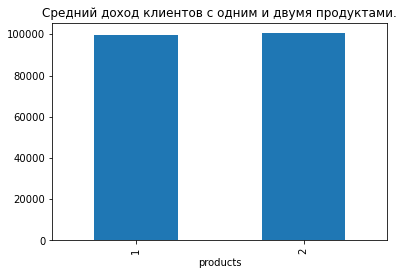

In [97]:
bankset_cut.groupby('products')['estimated_salary'].mean().plot(kind='bar');
plt.title('Средний доход клиентов с одним и двумя продуктами.')
plt.show()

<div class='alert alert-info'>
при проверке тестом Стьюдента дисперсию не проверяла на основании того, что выборки из схожих совокупностей поэтому считаю дисперсии совокупностей равными

In [98]:
print('Стандартные отклонения у первой и второй выборки: {:.2f} и {:.2f}'.format(sample_1.std(),sample_2.std()))

Стандартные отклонения у первой и второй выборки: 57363.63 и 57790.80


<div class='alert alert-info'>
    2. я посчитала тест Стьюдента применимым на основании вот этой рекомендации
    
    <Если вам повезло, и ваши данные распределены нормально, то t-test — оптимальное решение. Если данные распределены как-то иначе, но при этом в них нет выбросов (или вы от них избавились), тогда t-test тоже можно использовать. Если же в данных есть выбросы (даже редкие, но очень большие), тогда t-test может посчитать незначимым сдвиг среднего в выборках, даже если в действительности разница есть.>

тестом Маан Уитни я подтвердила схожесть распределения для дохода у клиентов с одним продуктом и с двумя продуктами.  

In [99]:
stat, p = st.mannwhitneyu(sample_1, sample_2)
print('Stat = %.3f,\np = %.3f' %(stat, p))

if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Stat = 11554276.000,
p = 0.204
Не получилось отвергнуть нулевую гипотезу


## Гипотеза 2

**Но:** средний кредитный рейтинг у мужчин и женщин совпадает

**Н1:** средний кредитный рейтинг у мужчин и женщин отличается

Сначала проверю распределение выборок на нормальность:

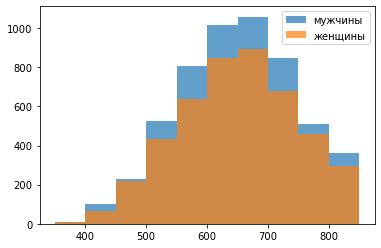

In [106]:
plt.hist(bankset.query('gender == "М"')['score'], label ='мужчины',alpha=0.7)
plt.hist(bankset.query('gender == "Ж"')['score'], label='женщины',alpha=0.7)
plt.legend()
plt.show()

In [107]:
sample_m = bankset.query('gender == "М"')['score'].tolist()

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_m)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 


p-значение:  1.6681487192016925e-14
Отвергаем нулевую гипотезу: распределение не нормально


/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [108]:
sample_w = bankset.query('gender == "Ж"')['score'].tolist()

alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sample_w)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 


p-значение:  4.04445086362587e-13
Отвергаем нулевую гипотезу: распределение не нормально


на мой взгляд распределения вполне нормальные, только обрезанные справа, выбросов нет. По-моему, тут всё-равно можно Стьюдента применить. Проверю равенство дисперсий

In [109]:
import statistics

In [110]:
print('Стандартные отклонения у первой и второй выборки: {:.2f} и {:.2f}'.format(
    statistics.stdev(sample_m),statistics.stdev(sample_w)))

Стандартные отклонения у первой и второй выборки: 96.55 и 96.79


Почти одинаковы. проверю гипотезу о равенстве средних в двух независимых выборках тестом Стьюдента

In [111]:
print('Расчетные средний кредитный рейтинг у мужчин:{:.2f} и у женщин:{:.2f}'.format(statistics.mean(sample_m),statistics.mean(sample_w)))

Расчетные средний кредитный рейтинг у мужчин:650.28 и у женщин:650.83


In [112]:
alpha = 0.05 

results = st.ttest_ind(sample_m, sample_w, equal_var = True) #есть основания, что выборки из схожих совокупностей
                                                            #поэтому считаю дисперсии совокупностей равными

print('p-значение: {:.2}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.78
Не получилось отвергнуть нулевую гипотезу


Вывод: с вероятностью 95% средний кредитный рейтинг у мужчин и женщин совпадает.

# Выводы, рекомендации

Была рассмотрена выборка из 10000 клиентов банка, по каждому из которых есть информация по 12 признакам. Все пользователи в датасете уникальные, данные полные, дубликатов нет. Предоставленные данные по клиентах также полные, кроме информации о балансе на счете. У 36% клиентов эта информация не указана (предположительно, это клиенты, использующие кредитные продукты банка и не имеющие другого расчетного счета - данное предположение желательно проверить). Интересно, что у клиентов из Ростова Великого этот столбец заполнен полностью, а пропуски есть у клиентов в других городах.

Также есть вопросы к информации о доходе клиентов. Данные имеют неестественное распределение, одинаковое количество клиентов с маленьким средним и высоким доходом. Требуется уточнение по источнику и качеству данных о доходе клиентов (столбец estimated_salary).

## Анализ данных

Почти ровно половина клиентов из Ярославля и по 1/4 соответственно из Рыбинска и Ростова Великого.
Различий в клиентах между городами немного, в Ростове Великом заметно больше доля оттока (0.32 против 0.16 в двух других городах).

Возраст клиентов находится в диапазоне от 18 до 92 лет. Мужчин на 10% больше, чем женщин. При этом женщины на 8,5% чаще идут в отток.

Выявлены следующие закономерности и корреляции:

**-=Клиенты без остатка на счете (предположительно заемщики) =-**

Замечено, что чем больше продуктов и активности, тем меньше отток. Влияение не очень больше, но заметное (0.23). Соответственно, если это действительно заемщики, то предложение дополнительного продукта имеет положительное влияние на удержание клиента.

**-=Клиенты с остатком на счете =-**

нет явной корреляции между количеством продуктов и другими признаками.

**Активность (loyalty)**
Есть заметная разница в оттоке! Неактивных больше на 12%, что логично. Странно, что разница не больше.

По количеству используемых продуктов клиенты распределяются следующим образом: 51% клиентов используют 1 продукт, 46% - использут 2 продукта. 3 или 4 продукта используют чуть более 3% клиентов.

## Влияние возраста

Замечена положительная корреляция между оттоком и возрастом после 30 лет. Соответственно будет полезно обратить внимание на продвижение продуктов, актуальных на протяжении всей жизни клиента, в том числе и после достижения пенсионного возраста (пенсионный проект, инвестиционный проект).

В возрастной группе 30-60 заметная положительная корреляция между возрастом и оттоком (0.37). Предположительно, с течением возраста клиенты уходят из заплатного проекта (меняют работу и банк). Есть небольшая обратная корреляция с активностью, что логично.

В старшей группе (60+) корреляция между оттоком и возрастом обратная (-0.3), и большая обратная корреляция между активностью и оттоком (-0.66). То есть если клиент до пенсии остался с банком, то он более склонен остаться клиентом и дальше и пользоваться продуктами банка активнее.
По признаку активности можно выявлять клиентов с риском оттока на ранней стадии.

## Сегментация по количеству продуктов

Для удобства назову группы клиентов по номерам  от 1 до 4-х в соответствии с количеством продуктов.

По размеру выделяются две группы - с одним продуктом и с двумя продуктами. Клиенты с 3-4 продуктами малочисленны (вместе они составляют ок 3% от датасета), но у группы с 4 продуктами 100% отток, этим она интересна, и у группа с 3 продуктами тоже высокая доля оттока.

Доля оттока на 20% меньше у клиентов с двумя продуктами по сравнению с клиентами с одним продуктом.

Вторая группа более молодая и более активная, чем все остальные.

Доля клиентов с балансом различается во всех группах, но затрудняюсь сделать выводы из этого. Например, больше всего клиентов без баланса имеют два продукта. Что это значит? Что они взяли кредит и что-то ещё из продуктов банка? Ну возможно. И при этом у них самая низкая доля оттока. С кредитом на руках далеко не убежишь...

Четвертая группа выделяется тем, что при максимальном количестве продуктов в ней 100% отток, а в группе с тремя продуктами - 83% оттока. Логично предположить, что клиенты из этих групп изначально приобрели какой-то срочный продукт, например, взяли кредит/ипотеку, к этому продукту были привязаны другие продукты банка (расчетный счет, дебетовая/кредитная карта, страховка от мошенничества и т.п.), и с выплатой кредита/ипотеки они отказались и от всех остальных продуктов. 

Конечно, знание, какие именно продукты приобретались клиентами, было бы не лишним в этом проекте. С другой стороны, группы с 3 и 4 продуктами вместе составляют всего 3% от датасета. Поэтому какие-то обоснованные выводы можно делать только по первым двум группам.

Насчет группы клиентов с 3-4 продуктами можно уверенно сказать, что продажа дополнительных продуктов не привела к лояльности и не помогла удержать этих клиентов. Костяк клиентской базы составляют клиенты, пользующиеся одним или двуми продуктами банка, и использование двух продуктов явно снижает вероятность оттока клиента.

## Статистические гипотезы

В проекте были проверены три статистические гипотезы:

**Первая гипотеза:** средний доход клиентов с одним продуктом равен среднему доходу клиентов с двумя продуктами (с вероятностью 95%).
Эта гипотеза прошла проверку (её не удалось опровергнуть).

**Вторая гипотеза**
Была проверена и не опровергнута гипотеза о том среди клиентов банка средний кредитный рейтинг у мужчин и женщин совпадает. С вероятностью 95% это действительно так.



## Рекомендации
    
В качестве второго продукта для заемщиков могут быть актуальны такие варианты как страхование жизни и здоровья, страхование от потери дохода, ОСАГО и КАСКО, страхование недвижимости.

Для удержания женской аудитории могут быть полезны страховые продукты для детей.

Чтобы повысить активность клиентов, могут быть полезны такие доп.продукты как счет-копилка, инвестиционный счет (и другие инвестиционные продукты) - то есть такие продукты, которые предполагают регулярный мониторинг счета. 

Семейные продукты (семейный счет, дебетовая карта для ребенка) также могут стимулировать активность клиента.

Так как замечена положительная корреляция между оттоком и возрастом после 30 лет, будет полезно обратить внимание на продвижение продуктов, актуальных на протяжении всей жизни клиента, в том числе и после достижения пенсионного возраста (пенсионный проект, инвестиционный проект).

Чтобы не терять клиентов после ухода из зарплатного проекта, можно разработать систему лояльности, привязанную к сроку сотрудничества и оборотам по счету, скидку на процент по кредиту, а также подсказывать клиентам, как переводить деньги на счет с карт других банков без комиссии.

В старшей группе (60+) корреляция обратная. То есть если клиент до пенсии остался с банком, то он более склонен остаться клиентом и дальше и пользоваться продуктами банка активнее. В этой возрастной группе по признаку активности можно выявлять клиентов с риском оттока на ранней стадии.

Если подтверждается предположение, что клиенты без баланса и клиенты с большим количеством продуктов - это заемщики, то для их удержания помогут новые кредитные продукты: кредит или рассрочка на ремонт/покупку мебели для ипотечников, карты беспроцентной рассрочки, льготная ставка на последующее кредитование.